## JIRA performance Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('jira_issue.csv')
data_copy = data.copy()   # making the copy of dataset for backup

In [3]:
data.sample(5)      # Take the sample from the dataset

,id,created,description,key,priority,project,project_name,repositoryname,resolution,resolved,status,title,type,updated,votes,watchers,assignee_id,reporter_id
143,510114,2013-04-10 19:54:28,"When updating indexes (via node updates), inst...",MODE-1894,Blocker,MODE,ModeShape,JBOSS,Done,2013-04-11 00:02:45,Closed,"When updating indexes, ModeShape stores both t...",Bug,2013-10-24 17:23:41,0,2,553.0,553
12,509986,2006-08-30 20:14:56.394,Related to my comment in MNG-1412 - I decided ...,MECLIPSE-152,Major,MECLIPSE,Maven Eclipse Plugin,CODEHAUS,Fixed,2007-11-30 11:15:34.688,Closed,Write .classpath with ordered dependencies [in...,Improvement,2007-11-30 23:06:18.775,9,9,42646.0,8250
1795,511751,2007-09-20 23:58:30.165,I encountered the following error when running...,MDEP-113,Major,MDEP,Maven Dependency Plugin,CODEHAUS,Fixed,2007-09-21 06:59:01.874,Closed,Unable to find the mojo 'org.apache.maven.plug...,Bug,2007-09-21 06:59:01.862,0,0,75552.0,5018
2304,512241,2010-07-21 22:22:48,When you pass empty String as a parameter to o...,MODE-825,Major,MODE,ModeShape,JBOSS,Done,2010-07-21 23:31:51,Closed,Empty string as parameter for setDefaultPrimar...,Bug,2013-10-24 17:21:58,0,0,569.0,85784
585,510536,2012-10-10 00:10:49,Currently there is no way to specify a node's ...,MODE-1671,Critical,MODE,ModeShape,JBOSS,NaN,NaN,Reopened,Provide a way to specify a node's identifier i...,Feature Request,2013-08-29 23:56:30,0,2,NaN,86628


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2499 non-null   int64  
 1   created         2499 non-null   object 
 2   description     2448 non-null   object 
 3   key             2499 non-null   object 
 4   priority        2486 non-null   object 
 5   project         2499 non-null   object 
 6   project_name    2499 non-null   object 
 7   repositoryname  2499 non-null   object 
 8   resolution      2114 non-null   object 
 9   resolved        2114 non-null   object 
 10  status          2499 non-null   object 
 11  title           2499 non-null   object 
 12  type            2499 non-null   object 
 13  updated         2499 non-null   object 
 14  votes           2499 non-null   int64  
 15  watchers        2499 non-null   int64  
 16  assignee_id     1911 non-null   float64
 17  reporter_id     2499 non-null   i

### Modify the Data Type of particular field

In [5]:
data['created'] = pd.to_datetime(data['created'],format='ISO8601')
data['resolved'] = pd.to_datetime(data['resolved'],format='ISO8601')
data['updated'] = pd.to_datetime(data['updated'],format='ISO8601')
data['assignee_id']=data['assignee_id'].fillna(0.0).astype(int)

In [6]:
data.dtypes

id                         int64
created           datetime64[ns]
description               object
key                       object
priority                  object
project                   object
project_name              object
repositoryname            object
resolution                object
resolved          datetime64[ns]
status                    object
title                     object
type                      object
updated           datetime64[ns]
votes                      int64
watchers                   int64
assignee_id                int32
reporter_id                int64
dtype: object

### Dropped the unnecessary columns

In [7]:
data = data.drop(['votes','watchers'],axis=1)

In [8]:
data.columns

Index(['id', 'created', 'description', 'key', 'priority', 'project',
       'project_name', 'repositoryname', 'resolution', 'resolved', 'status',
       'title', 'type', 'updated', 'assignee_id', 'reporter_id'],
      dtype='object')

### Checking the duplicate value of the column

In [9]:
data['id'].duplicated().sum()

0

### Checking the null values of the columns

In [10]:
data.isnull().sum()

id                  0
created             0
description        51
key                 0
priority           13
project             0
project_name        0
repositoryname      0
resolution        385
resolved          385
status              0
title               0
type                0
updated             0
assignee_id         0
reporter_id         0
dtype: int64

### Issue priority should not be null

In [11]:
data['priority'].unique().tolist()

['Major', 'Critical', 'Blocker', 'Minor', 'Trivial', nan, 'Optional']

In [12]:
data[data['priority'].isna()]

,id,created,description,key,priority,project,project_name,repositoryname,resolution,resolved,status,title,type,updated,assignee_id,reporter_id
118,515077,2009-11-23 06:35:10.086,Please see whois DB for ownership of the tofte...,MAVENUPLOAD-2671,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Won't Fix,2010-02-06 04:44:48.187,Closed,Please add toften.net Maven repository,Wish,2010-02-06 04:44:48.246,42957,87369
158,518265,2006-05-01 03:53:43.905,New release of the cas-extend client,MAVENUPLOAD-870,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2006-05-03 13:37:09.180,Closed,cas-extend-client-java version 2.2,Task,2006-05-03 13:37:09.159,9813,16962
202,518367,2006-04-04 12:39:50.653,Saxon JDOM Library. Click on contributor lin...,MAVENUPLOAD-816,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2006-04-05 11:43:43.285,Closed,Saxon JDOM 8.7,Task,2006-04-05 11:43:43.283,0,16962
943,519102,2005-06-25 12:25:09.831,Snowball is available at: http://snowball.tart...,MAVENUPLOAD-423,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Incomplete,2005-06-28 10:28:41.599,Closed,Upload Snowball porter stemmer library,New Feature,2006-03-25 07:29:33.371,9813,76633
1123,519523,2004-06-29 23:03:32.000,Small utility class supporting config files in...,MAVENUPLOAD-151,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2004-07-06 21:46:52.000,Closed,Upload Ubique's IniEditor,Task,2006-03-25 07:29:00.678,47945,17366
1211,515930,2008-08-04 18:01:24.212,http://www.iizuka.co.uk/public/bcprov-jdk15-14...,MAVENUPLOAD-2165,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2008-09-27 04:20:51.506,Closed,Upload Bouncy Castle 1.40 JDK5,Wish,2008-09-27 04:20:51.504,9813,517
1447,516037,2008-06-17 20:59:28.839,"""gr.spinellis"",""mavensync@shell.sourceforge.ne...",MAVENUPLOAD-2107,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2008-07-04 02:55:59.764,Closed,upload ckjm,Wish,2008-07-04 02:55:59.762,9813,77294
1594,516478,2007-12-20 06:18:43.497,Please add this repository for synchronization...,MAVENUPLOAD-1866,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2008-01-03 04:35:12.318,Closed,QDWizard repository,Wish,2008-01-03 04:35:12.291,9813,82037
1709,516555,2007-12-06 06:36:56.182,"Hi, a new release of Unitils is available.Coul...",MAVENUPLOAD-1839,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2007-12-08 09:22:54.980,Closed,Upload Unitils 1.0,Task,2007-12-08 09:22:54.971,9813,87451
1758,516556,2007-12-06 04:55:06.325,NaN,MAVENUPLOAD-1838,NaN,MAVENUPLOAD,Maven Upload Requests,CODEHAUS,Fixed,2007-12-08 09:22:37.269,Closed,Upload FreeMarker 2.3.10,Task,2007-12-08 09:22:37.233,9813,34473


### Set the Priority as optional in each null row

In [13]:
data['priority'] = data['priority'].replace(np.nan,'Optional')

### Visualize the issue priority in the company till date

<Axes: ylabel='priority'>

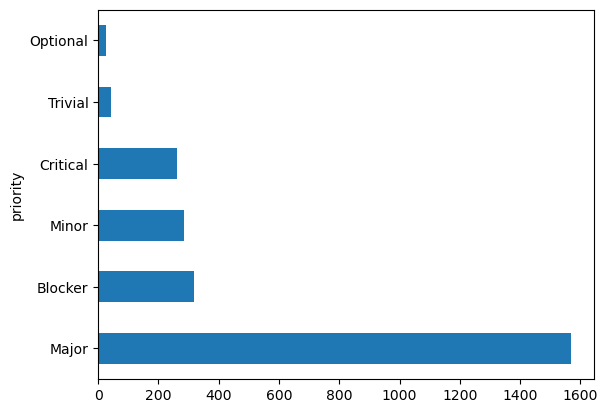

In [14]:
data['priority'].value_counts().plot.barh()

### confirmed deletion of the `Nan` from the priority List

In [15]:
data['priority'].unique().tolist()

['Major', 'Critical', 'Blocker', 'Minor', 'Trivial', 'Optional']

### Set the description according to the issue status

In [16]:
data['description'] = np.where(data['status']!= 'Open','Successfully completed the task','working on it') 

In [17]:
data.sample(5)

,id,created,description,key,priority,project,project_name,repositoryname,resolution,resolved,status,title,type,updated,assignee_id,reporter_id
1963,511880,2006-07-06 22:38:44.413,Successfully completed the task,MDEP-29,Major,MDEP,Maven Dependency Plugin,CODEHAUS,Fixed,2006-10-31 10:12:59.700,Closed,Make (sure) dependency:resolve outputs absolut...,Improvement,2006-12-14 01:55:53.966,75552,9032
1023,510985,2012-03-27 03:27:06.000,working on it,MODE-1446,Major,MODE,ModeShape,JBOSS,NaN,NaT,Open,Store binary files in S3,Feature Request,2013-10-24 00:57:16.000,0,569
135,510118,2013-04-09 15:47:38.000,Successfully completed the task,MODE-1890,Major,MODE,ModeShape,JBOSS,Won't Fix,2013-06-07 23:11:02.000,Closed,Expose Sharding Parameter for Hibernate Search,Feature Request,2013-06-07 23:11:57.000,0,86638
1854,511823,2010-12-09 20:17:20.000,Successfully completed the task,MODE-1049,Major,MODE,ModeShape,JBOSS,Done,2010-12-23 05:03:33.000,Closed,PlanUtil replaces descendant-node join conditi...,Bug,2013-10-24 17:20:18.000,569,86837
1988,511937,2010-10-22 21:57:37.000,Successfully completed the task,MODE-979,Major,MODE,ModeShape,JBOSS,Won't Fix,2010-11-18 07:00:21.000,Resolved,ModeShape cannot be built with tests.,Bug,2011-02-08 23:32:21.000,0,77703


In [18]:
data.dtypes

id                         int64
created           datetime64[ns]
description               object
key                       object
priority                  object
project                   object
project_name              object
repositoryname            object
resolution                object
resolved          datetime64[ns]
status                    object
title                     object
type                      object
updated           datetime64[ns]
assignee_id                int32
reporter_id                int64
dtype: object

In [19]:
data.duplicated().sum()

0

In [20]:
data.columns

Index(['id', 'created', 'description', 'key', 'priority', 'project',
       'project_name', 'repositoryname', 'resolution', 'resolved', 'status',
       'title', 'type', 'updated', 'assignee_id', 'reporter_id'],
      dtype='object')

### Create a new col for further usecase

In [21]:
data['created_year'] = data['created'].dt.year

In [22]:
data1 = data.groupby(['created_year','type']).agg({'id':'count'})

### Year wise Issue Count in the company

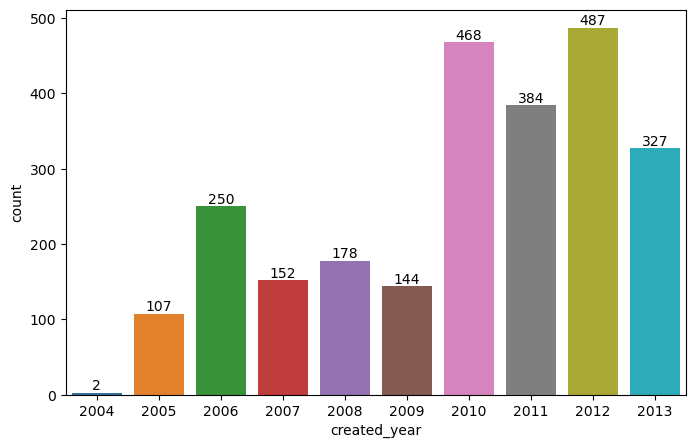

In [23]:
plt.figure(figsize=(8,5))
bar = sns.countplot(data=data, x= 'created_year')
bar.bar_label(bar.containers[0])
plt.show()

### Year wise issue type count

<Axes: xlabel='created_year'>

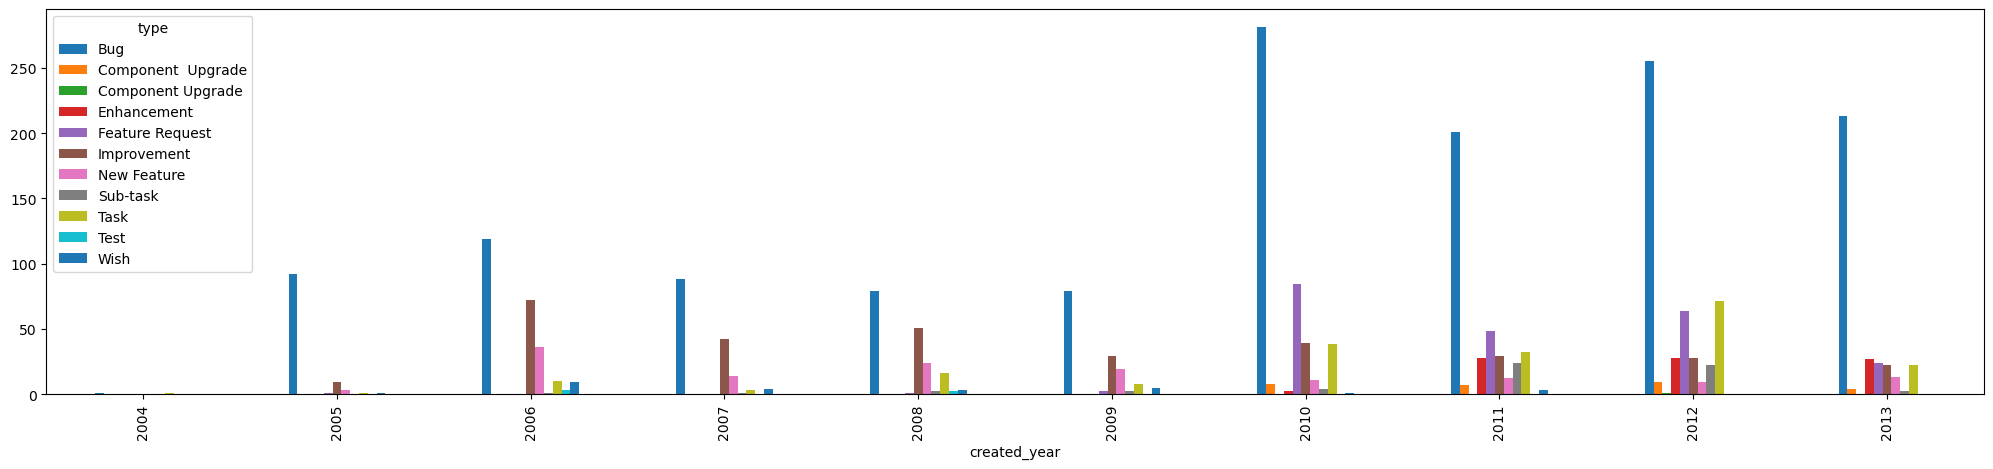

In [24]:
df1 = data.groupby(['created_year','type'])['type'].count()
df2 = df1.unstack(-1)
df2.plot.bar(figsize=(25,5))

### Issue Resolution Proportion till Date

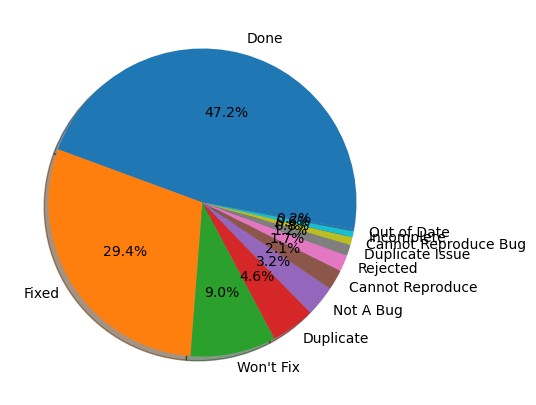

In [25]:
plt.figure(figsize=(25,5))
key = data['resolution'].value_counts().keys()
plt.pie(data['resolution'].value_counts(),startangle=350,labels=key,shadow=True,autopct='%1.1f%%')
plt.show()

### Issue Types with count

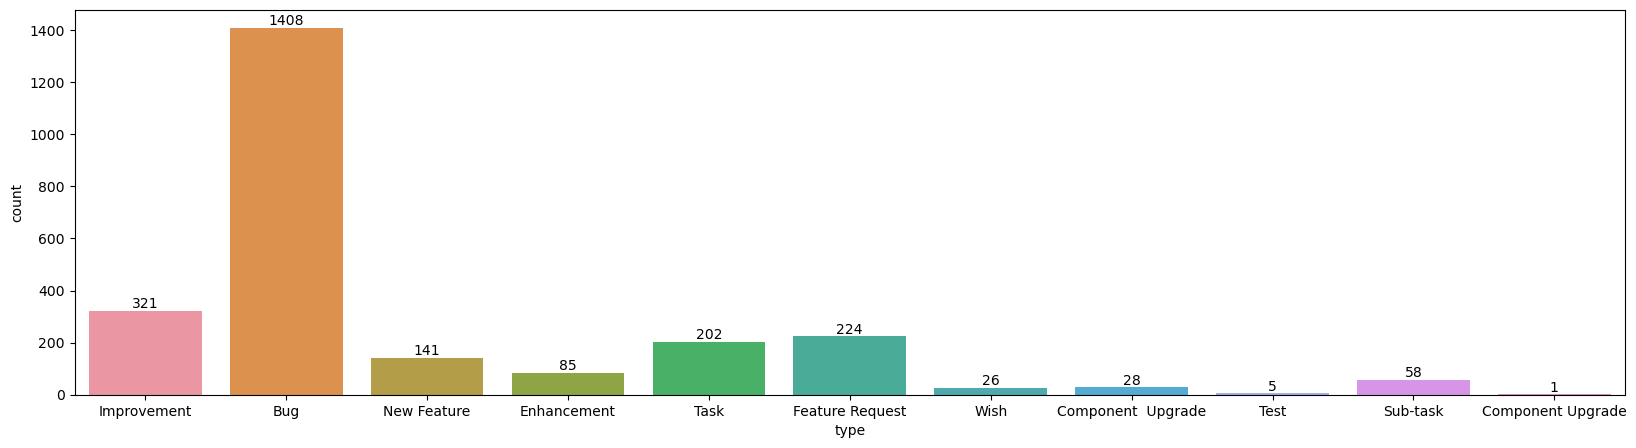

In [26]:
plt.figure(figsize=(20,5))
bar = sns.countplot(data=data, x= 'type',orient='v')
bar.bar_label(bar.containers[0])
plt.show()

### Project wise Issue type count

<Axes: xlabel='project'>

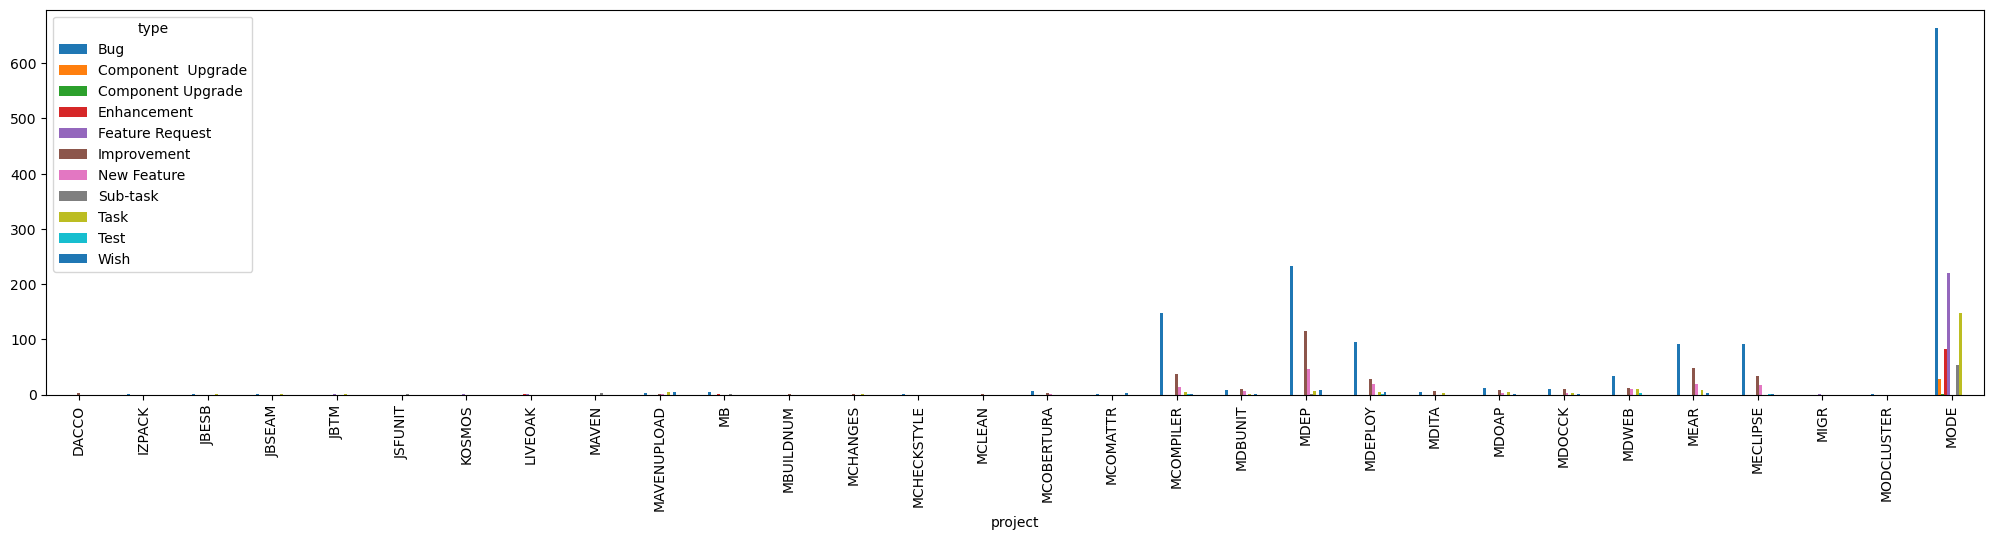

In [27]:
df1 = data.groupby(['project','type'])['type'].count()
df2 = df1.unstack(-1)
df2.plot.bar(figsize=(25,5))

### Proportion of Issue Priority

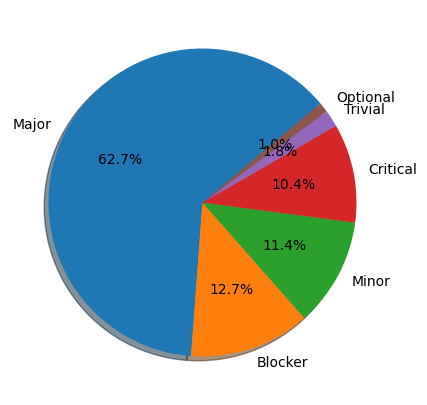

In [28]:
plt.figure(figsize=(25,5))
key = data['priority'].value_counts().keys()
plt.pie(data['priority'].value_counts(),startangle=40,labels=key,shadow=True,autopct='%1.1f%%')
plt.show()

### Year wise Issue Priority count

<Axes: xlabel='created_year'>

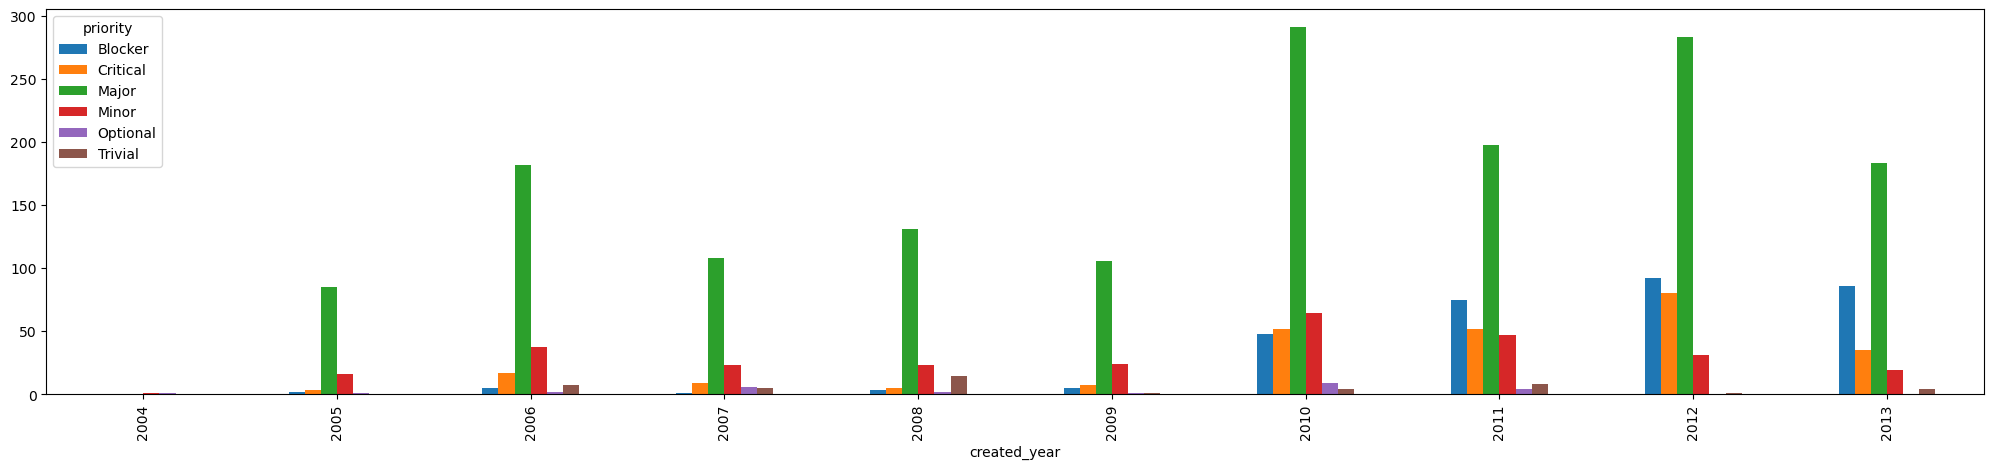

In [29]:
df1 = data.groupby(['created_year','priority'])['id'].count()
df2 = df1.unstack(-1)
df2.plot.bar(figsize=(25,5))

### Year wise count of Issue Resolution Status

<Axes: xlabel='created_year'>

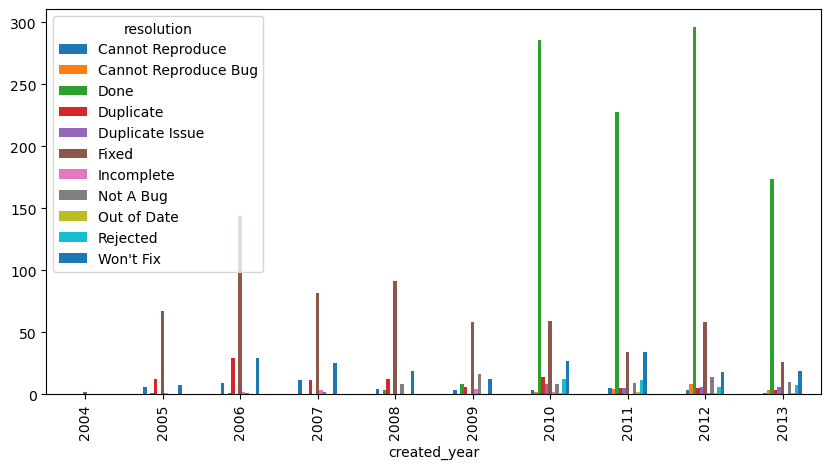

In [30]:
df1 = data.groupby(['created_year','resolution'])['type'].count()
df2 = df1.unstack(-1)
df2.plot.bar(figsize=(10,5))

### --------------------------------------------- END --------------------------------------